TUGAS DAY 1 MAPID BOOTCAMP PYTHON BASIC

Setup & Import Library

1. Import Libary yang digunakan untuk analisis data spasial

In [44]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import polygon, point

2. jelaskan fungsi dari libary yang sudah di install

pada pelaksanaannya ada beberapa libary yang diinstall dan mempunya penggunaan berbeda sebagai berikut
Tentu! Berdasarkan instruksi pada modul tugas Anda, berikut adalah penjelasan fungsi utama dari masing-masing library Python yang digunakan untuk analisis data spasial dan statistik:
a. Pandas (pd): 
Digunakan untuk manipulasi dan analisis data terstruktur dalam bentuk tabel (DataFrame). Library ini sangat krusial untuk membersihkan data, melakukan pemfilteran, dan mengelola statistik dasar sebelum diolah secara spasial.
b. GeoPandas (gpd): 
Merupakan ekstensi dari Pandas yang memungkinkan operasi pada data geometris (seperti titik, garis, dan poligon). Library ini digunakan untuk membaca file spasial seperti GeoJSON  dan melakukan analisis berbasis lokasi.
c. Folium: 
Digunakan untuk membuat visualisasi peta interaktif. Dengan library ini, Anda bisa menampilkan titik banjir (flood points) di atas peta dasar (basemap) yang dapat digeser dan diperbesar di dalam browser.
d. Matplotlib (plt): 
Library dasar untuk membuat visualisasi data statis, seperti grafik dan plot. Dalam tugas ini, Anda menggunakannya untuk menampilkan histogram dan mengatur tata letak gambar visualisasi.
e. Seaborn (sns): 
Library visualisasi data yang dibangun di atas Matplotlib dengan tampilan yang lebih estetis dan fitur statistik yang lebih canggih. Digunakan untuk membuat histplot, countplot, scatterplot, dan heatmap korelasi.
f. Numpy (np): 
Library inti untuk komputasi numerik di Python. Numpy sangat efisien dalam menangani operasi matematika pada array besar dan matriks yang sering dibutuhkan dalam analisis data statistik.
g. Shapely (Polygon, Point): 
Digunakan khusus untuk manipulasi dan analisis objek geometri planar. Library ini memungkinkan Anda mendefinisikan bentuk-bentuk geometris secara manual, seperti menentukan apakah suatu titik berada di dalam area tertentu.

Load Data GeoJSON

1. Load file data_point_pluvial_flood_dataset.geojson ke dalam GeoDataFrame.

In [22]:
hidrokarbon_path = r"C:\Users\ASUS\Desktop\MAPID\PHYTON\MAPID WEBGIS\DAY_1\Lab\data_point_pluvial_flood_dataset.geojson"

2. Tampilkan 5 baris pertama data

In [23]:
gdf_hidrokarbon = gpd.read_file(hidrokarbon_path)

print(gdf_hidrokarbon.head())

          X         Y      Slope    Curvature       Aspect       TWI     FA  \
0  3.909444  7.443056  46.686142 -3.888000e+09   45.000000 -3.250368  147.0   
1  3.908611  7.442778  52.151768  1.296000e+09   60.945396 -4.313832   61.0   
2  3.908889  7.442778  66.484085  0.000000e+00   67.619865 -8.327622    1.0   
3  3.909167  7.442778  58.007183 -2.592000e+09   38.659809 -4.707937   51.0   
4  3.909444  7.442778  60.503792 -1.296000e+09  351.869904 -5.985817   15.0   

   Drainage    Rainfall     SUSCEP                 geometry  
0  228.8528  101.515616  Very_High  POINT (3.90944 7.44306)  
1  229.6781   80.409863  Very_High  POINT (3.90861 7.44278)  
2  230.5920   78.986849  Very_High  POINT (3.90889 7.44278)  
3  235.4210   81.953151  Very_High  POINT (3.90917 7.44278)  
4  234.4346   85.866027  Very_High  POINT (3.90944 7.44278)  


Eksplorasi Struktur Data

1. Tampilkan info DataFrame (kolom, tipe data, jumlah data)

In [26]:
print("Info DataFrame")
gdf_hidrokarbon.info()

Info DataFrame
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   X           144401 non-null  float64 
 1   Y           144401 non-null  float64 
 2   Slope       144119 non-null  float64 
 3   Curvature   144401 non-null  float64 
 4   Aspect      144401 non-null  float64 
 5   TWI         144401 non-null  float64 
 6   FA          144401 non-null  float64 
 7   Drainage    144401 non-null  float64 
 8   Rainfall    144401 non-null  float64 
 9   SUSCEP      144401 non-null  str     
 10  geometry    144401 non-null  geometry
dtypes: float64(9), geometry(1), str(1)
memory usage: 12.1 MB


2. Tampilkan statistik deskriptif untuk parameter numerik.

In [27]:
print("Statistik Deskriptif")
print(gdf_hidrokarbon.describe())

Statistik Deskriptif
                   X              Y         Slope    Curvature         Aspect  \
count  144401.000000  144401.000000  1.441190e+05  1.444010e+05  1.444010e+05   
mean        3.891534       7.374551 -2.502788e+35 -8.342043e+35 -1.673122e+35   
std         0.027887       0.032459  9.225150e+36  1.682769e+37  7.543591e+36   
min         3.831111       7.311389 -3.402823e+38 -3.402823e+38 -3.402823e+38   
25%         3.868889       7.348333  5.105756e+01 -2.592000e+09  1.013099e+02   
50%         3.891667       7.374167  6.198023e+01  0.000000e+00  1.894623e+02   
75%         3.913611       7.400278  6.916712e+01  2.592000e+09  2.700000e+02   
max         3.954444       7.443056  8.657541e+01  3.888000e+10  3.591449e+02   

                TWI            FA       Drainage       Rainfall  
count  1.444010e+05  1.444010e+05  144401.000000  144401.000000  
mean  -2.120858e+34 -2.120858e+35     219.714542      74.786932  
std    2.686356e+36  8.492619e+36       7.057921   

In [31]:
gdf_hidrokarbon['centroid'] = gdf_hidrokarbon.geometry.centroid
gdf_hidrokarbon['longitude'] = gdf_hidrokarbon['centroid'].x
gdf_hidrokarbon['latitude'] = gdf_hidrokarbon['centroid'].y

gdf_hidrokarbon_final = gdf_hidrokarbon.copy()

print(gdf_hidrokarbon_final)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14172\665752339.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_hidrokarbon['centroid'] = gdf_hidrokarbon.geometry.centroid


               X         Y      Slope    Curvature       Aspect       TWI  \
0       3.909444  7.443056  46.686142 -3.888000e+09   45.000000 -3.250368   
1       3.908611  7.442778  52.151768  1.296000e+09   60.945396 -4.313832   
2       3.908889  7.442778  66.484085  0.000000e+00   67.619865 -8.327622   
3       3.909167  7.442778  58.007183 -2.592000e+09   38.659809 -4.707937   
4       3.909444  7.442778  60.503792 -1.296000e+09  351.869904 -5.985817   
...          ...       ...        ...           ...         ...       ...   
144396  3.864167  7.311667  70.837776  1.296000e+09  272.489563 -8.552538   
144397  3.864444  7.311667  72.578880  1.296000e+09  295.559967 -9.347733   
144398  3.864722  7.311667  70.667946  6.480000e+09  322.125031 -9.236161   
144399  3.859722  7.311389  61.980232  1.296000e+09  183.814072 -8.819514   
144400  3.860000  7.311389  68.768135  5.184000e+09  150.945389 -9.134113   

           FA  Drainage    Rainfall     SUSCEP                 geometry  \


Visualisasi Distribusi Parameter

1. Buat histogram untuk parameter Slope dan Rainfall.

Text(0.5, 1.0, 'Distribusi Slope')

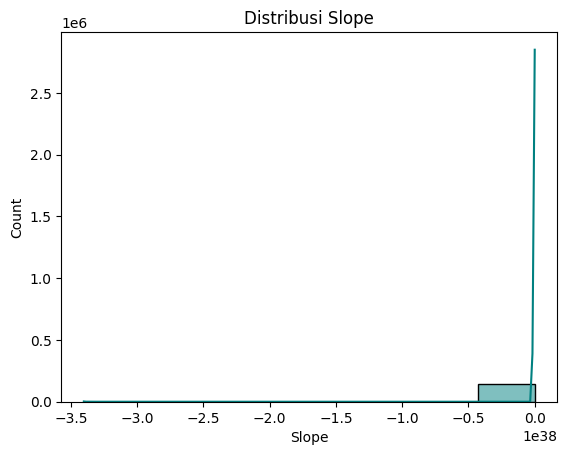

In [33]:
plt.Figure(figsize=(8,4))
sns.histplot(gdf_hidrokarbon_final['Slope'], bins=8, kde=True, color='teal')
plt.title('Distribusi Slope')

Text(0.5, 1.0, 'Distribusi Rainfall')

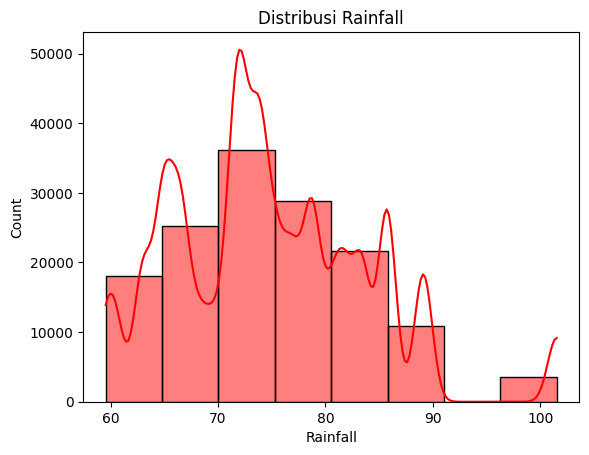

In [34]:
plt.Figure(figsize=(8,4))
sns.histplot(gdf_hidrokarbon_final['Rainfall'], bins=8, kde=True, color='red')
plt.title('Distribusi Rainfall')

2. Apa yang bisa kamu simpulkan dari distribusi data tersebut

Kesimpulan data Slope:
Pada data Slope masih tidak akurat hal itu dilihat dari hasil histogram yang cenderung terpusat dikanan adapun kemungkinan pada data Sloppe yang tersedia memiliki karakteristik kemiringan lereng yang seragam

Kesimpulan data Rainfall: Variasi curah hujan cukup beragam di seluruh titik sampel, yang mana perbedaan intensitas ini akan sangat mempengaruhi tingkat kerentanan banjir di masing-masing lokasi

Analisis Kategori Susceptibility

1. Hitung jumlah titik per kategori susceptibility

In [37]:
suscep_counts = gdf_hidrokarbon_final['SUSCEP'].value_counts()
print(suscep_counts)

SUSCEP
Moderate     38116
High         34451
Low          32252
Very_High    23456
No_Flood     16126
Name: count, dtype: int64


2. Visualisasikan hasilnya dengan bar chart

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14172\942136265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gdf_hidrokarbon_final, x='SUSCEP', palette='viridis')


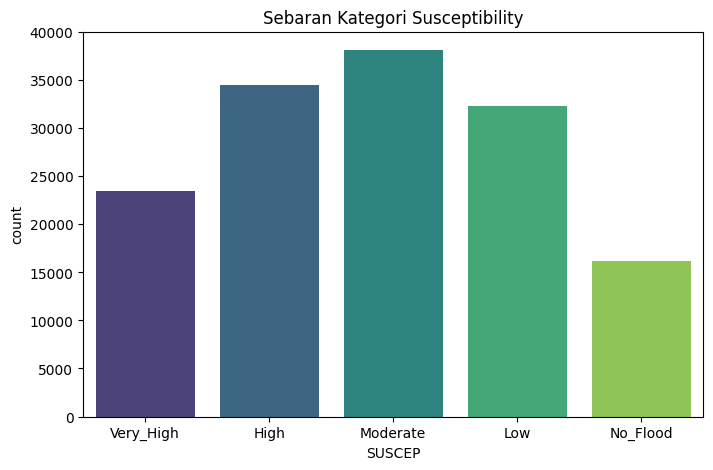

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=gdf_hidrokarbon_final, x='SUSCEP', palette='viridis')
plt.title('Sebaran Kategori Susceptibility')
plt.show()

Scatter Plot Hubungan Parameter

1. Buat scatter plot antara Slope dan Rainfall.

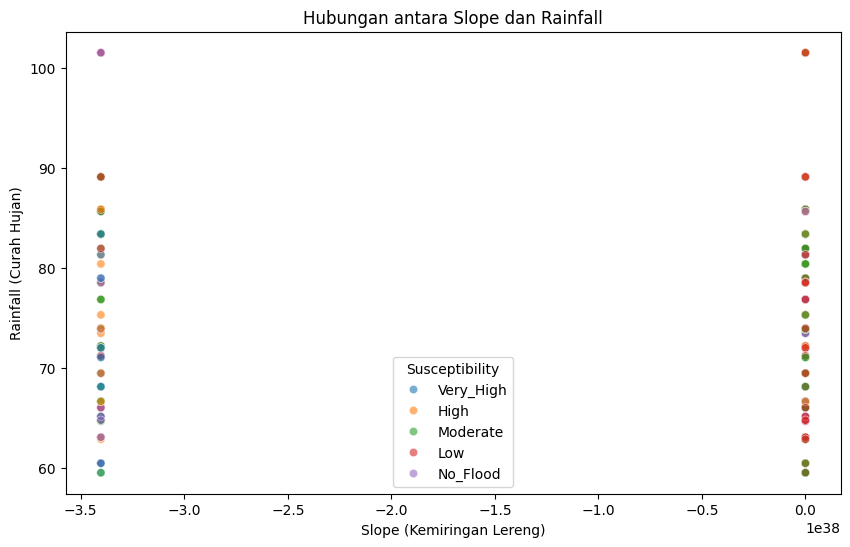

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdf_hidrokarbon_final, x='Slope', y='Rainfall', hue='SUSCEP', alpha=0.6)
plt.title('Hubungan antara Slope dan Rainfall')
plt.xlabel('Slope (Kemiringan Lereng)')
plt.ylabel('Rainfall (Curah Hujan)')
plt.legend(title='Susceptibility')
plt.show()

2. Apakah ada pola tertentu yang terlihat?

ya kemungkinan pada dataset ini, tingkat kerentanan banjir (Susceptibility) tidak ditentukan secara tunggal oleh interaksi langsung antara Slope dan Rainfall saja, melainkan kemungkinan besar dipengaruhi oleh parameter lain secara bersamaan

Heatmap Korelasi Parameter

1. Hitung matriks korelasi antar parameter numerik.

In [50]:
corr_matrix = gdf_hidrokarbon.corr(numeric_only=True)

2. Visualisasikan dengan heatmap.

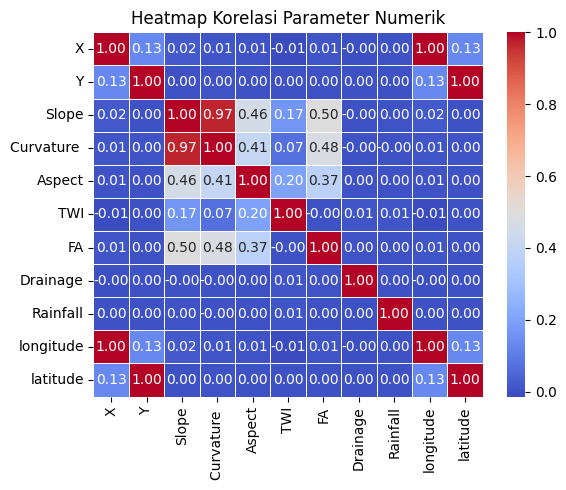

In [53]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Parameter Numerik')
plt.tight_layout()
plt.show()

Peta Interaktif Titik Flood

In [62]:
import folium

# 1. Pilih 5 titik secara acak sesuai instruksi [cite: 82, 90]
df_sample = gdf_hidrokarbon.sample(n=5)

# 2. Buat objek peta dengan Tiles Citra Satelit (Esri World Imagery)
m = folium.Map(
    location=[df_sample.geometry.y.mean(), df_sample.geometry.x.mean()], 
    zoom_start=15, # Zoom lebih dekat agar citra satelit terlihat detail
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri'
)

# 3. Tambahkan marker untuk setiap titik dengan Popup informasi [cite: 83, 84, 91]
for idx, row in df_sample.iterrows():
    # Menampilkan nilai susceptibility, slope, rainfall, dan TWI di popup 
    popup_text = (f"<b>SUSCEP:</b> {row['SUSCEP']}<br>"
                  f"<b>Slope:</b> {row['Slope']:.2f}<br>"
                  f"<b>Rainfall:</b> {row['Rainfall']:.2f}<br>"
                  f"<b>TWI:</b> {row['TWI']:.2f}")
    
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(popup_text, max_width=300),
        tooltip="Klik untuk detail lokasi",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# 4. Simpan peta sebagai file HTML [cite: 89, 92]
m.save('peta_flood_satelit.html')

# Tampilkan peta di notebook
m